In [8]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [9]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [10]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [28]:
# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600
#df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'].apply(lambda x: x * 3600)

# Fill NaN values in Assembly_EstTotalHours_ThisLaborGroup with 0
df['Assembly_EstTotalHours_ThisLaborGroup'].fillna(0, inplace=True)

# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600

df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Fab/Layout,16751,0.0,0.0
8403,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Material Handling,17,0.0,0.0
8404,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Weld,4153,0.0,0.0
8405,24-500,904279,S73A,1,PLATE,9.92,94.903,25.14,PL,3/16 x 15,"D - Steel, Paint All",1,0,Fab/Layout,9562,0.0,0.0


In [29]:
#df.dtypes
df['Assembly_EstTotalSeconds_ThisLaborGroup'].unique()

array([    0.     ,  6098.46   , 10474.86   , ...,  2792.673  ,
        2043.96525,   803.72025])

In [37]:
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalSeconds_ThisLaborGroup'].replace(0., np.nan)
df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,NaN
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,NaN
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Fab/Layout,16751,0.0,NaN
8403,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Material Handling,17,0.0,NaN
8404,24-500,876966,HR103,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Weld,4153,0.0,NaN
8405,24-500,904279,S73A,1,PLATE,9.92,94.903,25.14,PL,3/16 x 15,"D - Steel, Paint All",1,0,Fab/Layout,9562,0.0,NaN


In [38]:
# Drop columns with null values in the column Assembly_EstTotalHours_ThisLaborGroup
#df_drop = df.dropna(axis='columns', subset=['Assembly_EstTotalHours_ThisLaborGroup'])
df_drop = df.dropna(subset=['Assembly_EstTotalSeconds_ThisLaborGroup'])
df_drop

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
416,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,1.694017,6098.460000
417,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,2.909683,10474.860000
418,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,1.694017,6098.460000
419,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,2.909683,10474.860000
420,22-130,637120,B456,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,1.694017,6098.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,24-011,837518,B107,38,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,1649,0.099224,357.207843
7355,24-011,837518,B107,39,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,4,0.049612,178.603922
7366,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Fab/Layout,2310,0.775743,2792.673000
7367,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Material Handling,241,0.567768,2043.965250


In [53]:
df_reduce =df_drop.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash'], inplace=False)
df_reduce.head(30)

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup
416,637120,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,6098.460
417,637120,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,10474.860
418,637120,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,6098.460
419,637120,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,10474.860
420,637120,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,6098.460
421,637120,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2614,10474.860
422,637131,1,BEAM,23.08,633.943,101.31,W,12 x 26,"DS - Special Case/Steel, Paint All",1,8,Material Handling,95,24469.200
423,637131,1,BEAM,23.08,633.943,101.31,W,12 x 26,"DS - Special Case/Steel, Paint All",1,8,Peddi Assembler,2322,7328.304
424,637137,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",1,18,Material Handling,20,6098.652
425,637137,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",1,18,Peddi Assembler,2589,10475.028


In [54]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_SurfaceAreaEachSqFt',
       'Assembly_MainPartShape', 'Assembly_MainPartDimension',
       'Assembly_MainPartFinishDescr', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup'],
      dtype='object')

In [55]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID                 827
EPM_InstanceNumber                           90
Assembly_MainPieceProductionCode             18
Assembly_MainPartLengthFt                   476
Assembly_WeightEachLbs                      738
Assembly_SurfaceAreaEachSqFt                724
Assembly_MainPartShape                       10
Assembly_MainPartDimension                  156
Assembly_MainPartFinishDescr                  9
Assembly_TotalQuantityInJob                  19
Assembly_NumSmallParts                       74
EPM_AdjustedStationName                       6
TimeInSeconds_ThisWorkSegment              1598
Assembly_EstTotalSeconds_ThisLaborGroup    1954
dtype: int64


In [56]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,Assembly_MainPartDimension_12 x 65,Assembly_MainPartDimension_12 x 72,Assembly_MainPartDimension_12 x 79,Assembly_MainPartDimension_12 x 8.639,Assembly_MainPartDimension_12 x 96,Assembly_MainPartDimension_14 x 120,Assembly_MainPartDimension_14 x 159,Assembly_MainPartDimension_14 x 211,Assembly_MainPartDimension_14 x 22,Assembly_MainPartDimension_14 x 233,Assembly_MainPartDimension_14 x 283,Assembly_MainPartDimension_14 x 30,Assembly_MainPartDimension_14 x 342,Assembly_MainPartDimension_14 x 398,Assembly_MainPartDimension_14 x 455,Assembly_MainPartDimension_14 x 500,Assembly_MainPartDimension_14 x 550,Assembly_MainPartDimension_14 x 61,Assembly_MainPartDimension_14 x 68,Assembly_MainPartDimension_14 x 82,Assembly_MainPartDimension_14 x 90,Assembly_MainPartDimension_16 x 26,Assembly_MainPartDimension_16 x 31,Assembly_MainPartDimension_18 x 35,Assembly_MainPartDimension_18 x 40,Assembly_MainPartDimension_18 x 46,Assembly_MainPartDimension_18 x 97,Assembly_MainPartDimension_2 x 2 x 0.25,Assembly_MainPartDimension_20 x 8 x 0.625,Assembly_MainPartDimension_21 x 44,Assembly_MainPartDimension_21 x 50,Assembly_MainPartDimension_21 x 55,Assembly_MainPartDimension_24 x 55,Assembly_MainPartDimension_24 x 62,Assembly_MainPartDimension_24 x 68,Assembly_MainPartDimension_24 x

In [57]:
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup',
       'Assembly_MainPieceProductionCode_ALUM STRINGER',
       ...
       'Assembly_MainPartFinishDescr_ES - Special Case/Exterior Exposed',
       'Assembly_MainPartFinishDescr_G - Galvanized',
       'Assembly_MainPartFinishDescr_GF - Fabrication Req'd After Galvanizing',
       'Assembly_MainPartFinishDescr_N - No Paint',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=208)

In [58]:
X = df_reduce_encoded.copy()
X.drop("Assembly_SurfaceAreaEachSqFt", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPartShape_AC,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,Assembly_MainPartDimension_12 x 65,Assembly_MainPartDimension_12 x 72,Assembly_MainPartDimension_12 x 79,Assembly_MainPartDimension_12 x 8.639,Assembly_MainPartDimension_12 x 96,Assembly_MainPartDimension_14 x 120,Assembly_MainPartDimension_14 x 159,Assembly_MainPartDimension_14 x 211,Assembly_MainPartDimension_14 x 22,Assembly_MainPartDimension_14 x 233,Assembly_MainPartDimension_14 x 283,Assembly_MainPartDimension_14 x 30,Assembly_MainPartDimension_14 x 342,Assembly_MainPartDimension_14 x 398,Assembly_MainPartDimension_14 x 455,Assembly_MainPartDimension_14 x 500,Assembly_MainPartDimension_14 x 550,Assembly_MainPartDimension_14 x 61,Assembly_MainPartDimension_14 x 68,Assembly_MainPartDimension_14 x 82,Assembly_MainPartDimension_14 x 90,Assembly_MainPartDimension_16 x 26,Assembly_MainPartDimension_16 x 31,Assembly_MainPartDimension_18 x 35,Assembly_MainPartDimension_18 x 40,Assembly_MainPartDimension_18 x 46,Assembly_MainPartDimension_18 x 97,Assembly_MainPartDimension_2 x 2 x 0.25,Assembly_MainPartDimension_20 x 8 x 0.625,Assembly_MainPartDimension_21 x 44,Assembly_MainPartDimension_21 x 50,Assembly_MainPartDimension_21 x 55,Assembly_MainPartDimension_24 x 55,Assembly_MainPartDimension_24 x 62,Assembly_MainPartDimension_24 x 68,Assembly_MainPartDimension_24 x 76,Assembly_MainPartDimensio

In [59]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([  62, 2525,   99, 2620,   14], dtype=int64)

In [60]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (2794, 207)
Targe Shape: (2794,)


In [61]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [63]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [64]:
X_scaler

StandardScaler()

In [65]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_test_scaled

array([[-0.52387025, -0.26612276,  1.44584396, ..., -0.75139899,
        -0.19135187,  1.60280844],
       [ 0.27227413, -0.26612276,  1.09402051, ...,  1.33085086,
        -0.19135187, -0.62390488],
       [ 1.63915227, -0.25348802, -0.06870318, ..., -0.75139899,
        -0.19135187, -0.62390488],
       ...,
       [-0.52387025, -0.26612276,  1.44584396, ..., -0.75139899,
        -0.19135187, -0.62390488],
       [-0.07892644, -0.26612276,  2.1153648 , ..., -0.75139899,
        -0.19135187, -0.62390488],
       [ 0.6142153 , -0.26612276,  0.55937887, ...,  1.33085086,
        -0.19135187, -0.62390488]])

# Fitting the Random Forest Model

In [67]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor()

In [68]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [69]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [71]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): 0.8122902909874804
Random Forest Regression Mean Absolute Error: 482.8720743919887


In [72]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.0033174497626013927
EPM_InstanceNumber: 1.2507059768567435e-07
Assembly_MainPartLengthFt: 0.00015234505288996107
Assembly_WeightEachLbs: 0.0008230881973890996
Assembly_TotalQuantityInJob: 1.482561927130297e-06
Assembly_NumSmallParts: 0.0002169011218075749
TimeInSeconds_ThisWorkSegment: 0.646160834522954
Assembly_EstTotalSeconds_ThisLaborGroup: 0.3449200734686406
Assembly_MainPieceProductionCode_ALUM STRINGER: 1.2247530502173544e-11
Assembly_MainPieceProductionCode_ANGLE: 6.619164880619564e-10
Assembly_MainPieceProductionCode_BEAM: 1.0717720200275232e-05
Assembly_MainPieceProductionCode_BENT PLATE: 3.1202900821803366e-09
Assembly_MainPieceProductionCode_BOLLARD: 6.118760307726853e-11
Assembly_MainPieceProductionCode_CHANNEL: 1.7068880951155058e-08
Assembly_MainPieceProductionCode_COLUMN: 1.541530617026978e-05
Assembly_MainPieceProductionCode_CRANE GIRDER: 0.0006562223747107382
Assembly_MainPieceProductionCode_EMBED: 1.4296083852877325e

# Predict and Plot

In [78]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Assembly_EstTotalSeconds_ThisLaborGroup': X_test['Assembly_EstTotalSeconds_ThisLaborGroup'],})

# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']

predictions.head(15)

,Actual,Predicted,Assembly_EstTotalSeconds_ThisLaborGroup,Difference
2912,6718,6708.26,9300.744,9.74
6164,2,2.00,8368.632,0.00
1063,2899,2897.47,8727.120,1.53
6444,8,8.00,47083.176,0.00
1052,5,5.00,18592.848,0.00
3340,4672,4656.04,51811.848,15.96
3815,677,672.37,711.252,4.63
4461,7539,7538.06,16719.696,0.94
2965,3444,3434.16,3090.312,9.84
3234,0,0.00,2585.952,0.00


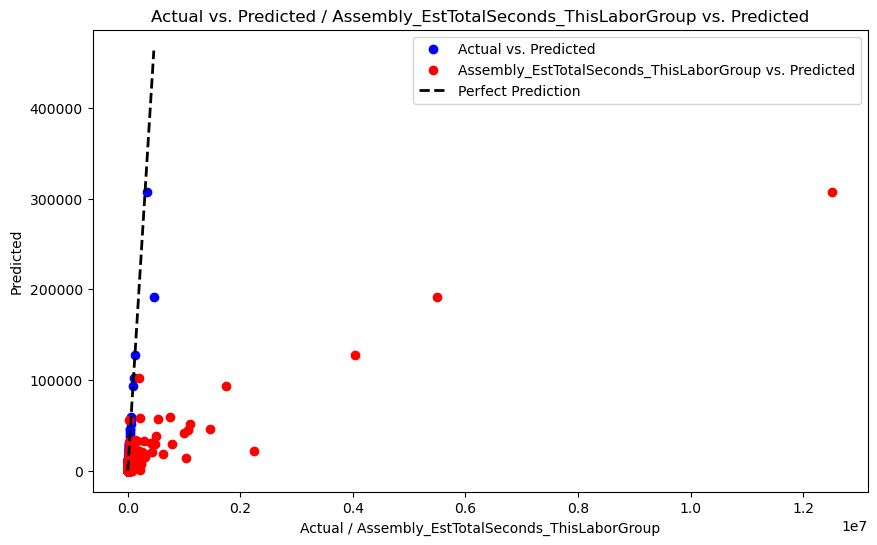

In [74]:
# Plot actual vs. predicted values and Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')

# Plot Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.scatter(X_test['Assembly_EstTotalSeconds_ThisLaborGroup'], y_pred_rf, color='red', label='Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual / Assembly_EstTotalSeconds_ThisLaborGroup')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted / Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')
plt.legend()
plt.show()

In [22]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()

,Actual,Predicted
0,0,0.00
1,4908,4906.69
2,218,217.48
3,3990,3978.95
4,14,14.00


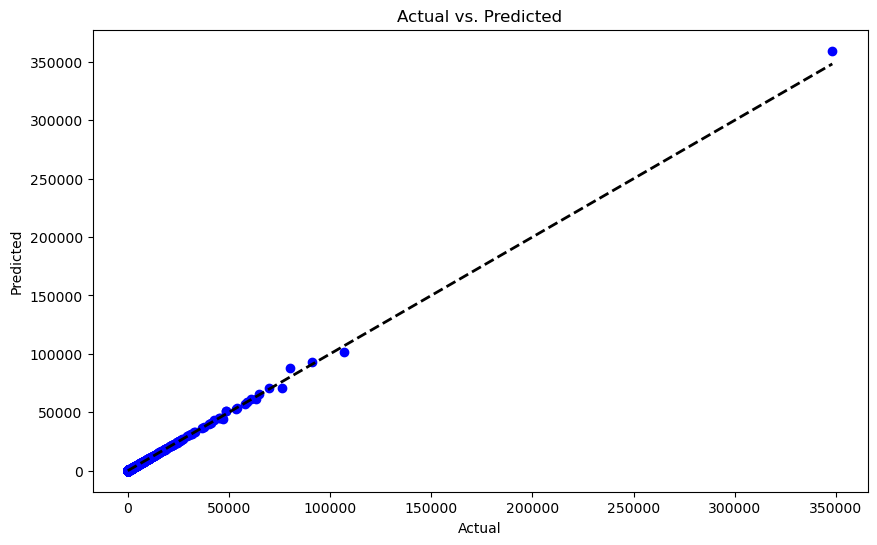

In [23]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.9988097519585603
Random Forest Regression Mean Absolute Error: 28.41059942911513


- The R-squared score of 0.988 indicates that approximately 98.8% of the variance in the target variable can be explained by the features in the model.- 
The Mean Absolute Error (MAE) of 48.87 seconds indicates that, on average, the model's predictions are off by approximately 48.87 seconds.

# Random Forest Classifer

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Convert TimeInSeconds_ThisWorkSegment to categorical variable
y_class = pd.qcut(df_reduce_encoded['TimeInSeconds_ThisWorkSegment'], q=5, labels=[1, 2, 3, 4, 5])

In [27]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [28]:
# Scale the features
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train_class)
X_test_scaled_class = scaler_class.transform(X_test_class)

In [29]:
# Instantiate the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=78)

In [30]:
# Fit the model to the training data
rf_clf.fit(X_train_scaled_class, y_train_class)

RandomForestClassifier(n_estimators=500, random_state=78)

In [31]:
# Predict the target values for the test set
y_pred_rf_class = rf_clf.predict(X_test_scaled_class)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9346016646848989


# Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

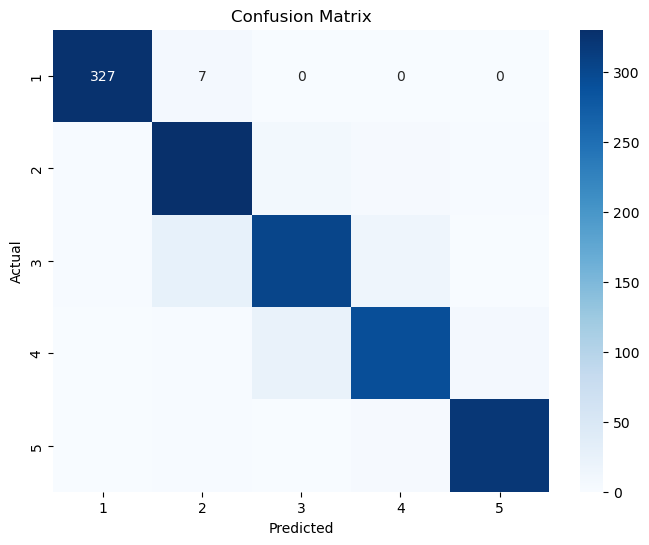

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Define labels for the confusion matrix
labels = [1, 2, 3, 4, 5]

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Display results
print("Confusion Matrix:")
display(cm_df)
acc_score = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Accuracy Score:{acc_score}")
print("Classification Report")
print(classification_report(y_test_class, y_pred_rf_class))

Confusion Matrix:


,1,2,3,4,5
1,327,7,0,0,0
2,2,330,9,4,2
3,2,27,303,16,1
4,0,2,24,292,7
5,0,2,0,5,320


Accuracy Score:0.9346016646848989
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       334
           2       0.90      0.95      0.92       347
           3       0.90      0.87      0.88       349
           4       0.92      0.90      0.91       325
           5       0.97      0.98      0.97       327

    accuracy                           0.93      1682
   macro avg       0.94      0.94      0.93      1682
weighted avg       0.93      0.93      0.93      1682



In [36]:
# Calculate feature importances
feature_importances = rf_clf.feature_importances_

# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

[(0.35148312040636237, 'TimeInSeconds_ThisWorkSegment'),
 (0.06534850258242265, 'Assembly_WeightEachLbs'),
 (0.06504075964046484, 'EPM_InstanceNumber'),
 (0.05251858303365705, 'Assembly_MainPartLengthFt'),
 (0.05048184347015277, 'EPM_ProductionControlItemID'),
 (0.0481376825723796, 'Assembly_TotalQuantityInJob'),
 (0.040933686291208096, 'Assembly_NumSmallParts'),
 (0.04048260695678904, 'Assembly_EstTotalHours_ThisLaborGroup'),
 (0.040457206992818864, 'EPM_AdjustedStationName_Material Handling'),
 (0.017974418475209572, 'EPM_AdjustedStationName_Weld'),
 (0.01741108255373753, 'EPM_AdjustedStationName_Fab/Layout'),
 (0.013685180933046222, 'Assembly_MainPieceProductionCode_SHIM STACK'),
 (0.007977945394464765, 'Assembly_MainPartFinishDescr_N - No Paint'),
 (0.007697588062243407, 'Assembly_MainPartShape_FB'),
 (0.006334361214813422, 'Assembly_MainPartShape_PL'),
 (0.005632501520347145, 'Assembly_MainPartFinishDescr_G - Galvanized'),
 (0.005471096106985997, 'Assembly_MainPartFinishDescr_D - 

<Figure size 1000x600 with 0 Axes>

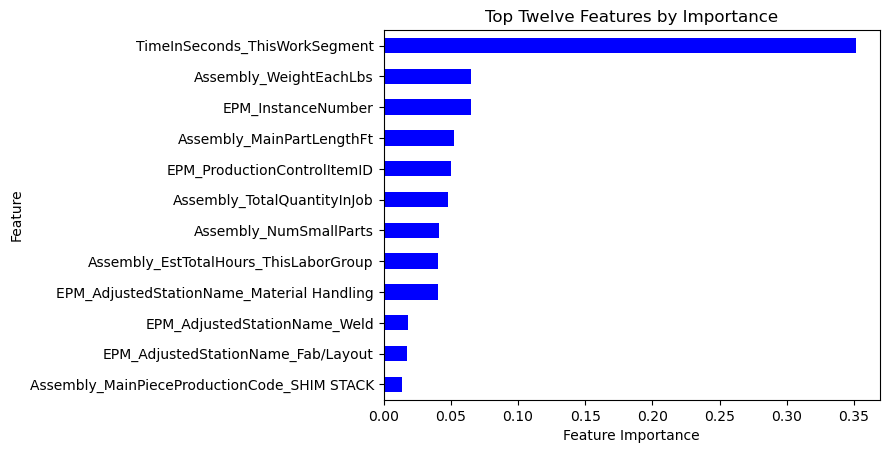

In [37]:
# Visualize features by importance
plt.figure(figsize=(10, 6))
feature_importance_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_ten_features = feature_importance_sorted.tail(12)  # Selecting the top ten features
top_ten_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()